# Redes neuronales convolucionales: Aplicación

¿Qué vamos a hacer?

- Implementar una red convolucional en Keras
- Entrenar la red en un dataset con fotos números con señas
- Usar la red para predecir en ejemplos nuevos

In [2]:
from google.colab import files

uploaded = files.upload()
#subir el archivo dataset.zip

Saving dataset.zip to dataset.zip


In [3]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: cnn_utils.py            
   creating: datasets/
  inflating: datasets/test_signs.h5  
  inflating: datasets/train_signs.h5  


In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [5]:
# Cargar el dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

SIGNS es un dataset con una colección de 6 signos hechos con manos representando los números del 0 al 5.

<img src="https://drive.google.com/uc?export=view&id=1Tm9arSkvypYpXzANQo4C2DtMWzkjA4hO" style="width:800px;height:300px;">

La próxima celda muestra un ejemplo de seña y su label.

y = 2


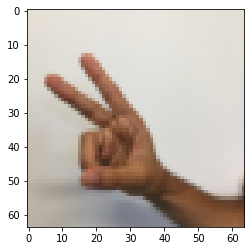

In [6]:
# Ejemplo del dataset
index = 6
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [7]:
# veamos un poco el dataset
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("Número de ejemplos de training = " + str(X_train.shape[0]))
print ("Número de ejemplos de test = " + str(X_test.shape[0]))
print ("dimensiones de X_train: " + str(X_train.shape))
print ("dimensiones de Y_train: " + str(Y_train.shape))
print ("dimensiones de X_test: " + str(X_test.shape))
print ("dimensiones de Y_test shape: " + str(Y_test.shape))

Número de ejemplos de training = 1080
Número de ejemplos de test = 120
dimensiones de X_train: (1080, 64, 64, 3)
dimensiones de Y_train: (1080, 6)
dimensiones de X_test: (120, 64, 64, 3)
dimensiones de Y_test shape: (120, 6)


Estas son las capas de keras que vamos a utilizar:

Capa Convolucional:

`Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)`


Capa Max Pooling, la función tiene estos parámetros: 

`MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)`

Capa Flatten:

`Flatten(
    data_format=None, **kwargs
)`

Capa Dense:

`Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)`

Fuente: tps://www.tensorflow.org/api_docs/python/tf/keras/layers

Estructura de la red en detalle:

- CONV2D: filtro de 4x4, 8 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 8x8, stride 8, padding 'SAME'
- CONV2D: filtro de 2x2, 16 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 4x4, stride 4, padding 'SAME'
- FLATTEN
- Capa FC con 6 salidas


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
# usar Sequential
model = Sequential()
# agregar las capas

### Comenzar el código acá ###
model.add(Conv2D(filters = 8, kernel_size = (4, 4), strides=1, padding='same', activation='relu', input_shape=(64, 64, 3)))
#model.add() agregar las demás capas
#MAXPOOL: window 8x8, stride 8, padding 'SAME'
model.add(MaxPooling2D(pool_size=8,strides=8,padding='same'))

#CONV2D: filtro de 2x2, 16 canales, stride of 1, padding 'SAME', activación RELU
#MAXPOOL: window 4x4, stride 4, padding 'SAME'
model.add(Conv2D(16, (2,2),strides=1, padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=4,strides=4,padding='same'))

#FLATTEN
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

model_history = model.fit(X_train, Y_train, epochs=30,batch_size= 64,
                    validation_data=(X_test, Y_test))

Epoch 1/30
17/17 [==============================] - 2s 136ms/step - loss: 1.7938 - accuracy: 0.1611 - val_loss: 1.7822 - val_accuracy: 0.1750
Epoch 2/30
17/17 [==============================] - 2s 108ms/step - loss: 1.7459 - accuracy: 0.2481 - val_loss: 1.7378 - val_accuracy: 0.2833
Epoch 3/30
17/17 [==============================] - 2s 103ms/step - loss: 1.5773 - accuracy: 0.3278 - val_loss: 1.6084 - val_accuracy: 0.3333
Epoch 4/30
17/17 [==============================] - 2s 107ms/step - loss: 1.4387 - accuracy: 0.4231 - val_loss: 1.4078 - val_accuracy: 0.4500
Epoch 5/30
17/17 [==============================] - 2s 112ms/step - loss: 1.2728 - accuracy: 0.5231 - val_loss: 1.3374 - val_accuracy: 0.4750
Epoch 6/30
17/17 [==============================] - 2s 112ms/step - loss: 1.2026 - accuracy: 0.5102 - val_loss: 1.2034 - val_accuracy: 0.5083
Epoch 7/30
17/17 [==============================] - 2s 105ms/step - loss: 1.1014 - accuracy: 0.5852 - val_loss: 1.1274 - val_accuracy: 0.5167
Epoch 

Cálculo manual de HPs.

In [79]:
# Entrada: 64x64x3

# Conv1
kernel_w = 4
n_input_channels = 3
n_filters = 8
print("HPs de Conv1: ", (kernel_w*kernel_w*n_input_channels+1)*n_filters )

# MaxPool1 no tiene HPs, pero interesa calcular tamaño de salida:
input_w = 64
pool_sz = 8
padding = 0
stride = 8
print("Output shape de MaxPool1: ", ((input_w-pool_sz+2*padding)/stride)+1 )

# Conv2
kernel_w = 2
n_input_channels = 8
n_filters = 16
print("HPs de Conv2: ", (kernel_w*kernel_w*n_input_channels+1)*n_filters )

# MaxPool1 no tiene HPs, pero interesa calcular tamaño de salida:
input_w = 8
pool_sz = 4
padding = 0
stride = 4
print("Output shape de MaxPool2: ", ((input_w-pool_sz+2*padding)/stride)+1 )

# Salida n_inputs * n_outputs
input_w = 2
n_filters = 16
n_outputs = 6
print("HPs de FC: ", input_w**2*n_filters * n_outputs + n_outputs)

print("Total HPs:",392+528+390)

HPs de Conv1:  392
Output shape de MaxPool1:  8.0
HPs de Conv2:  528
Output shape de MaxPool2:  2.0
HPs de FC:  390
Total HPs: 1310


Validación contra model.summary()

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
______________________________________________________